In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib 
import matplotlib.pyplot as plt
import random
import json
import keras

import tensorflow as tf
from tensorflow.python.keras.models import model_from_json, load_model
from tensorflow.python.keras.applications.inception_v3 import InceptionV3
from tensorflow.python.keras.preprocessing import *
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.optimizers import RMSprop, SGD
from tensorflow.python.keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import *

Using TensorFlow backend.


In [5]:
batch_size = 16
train_input_shape = (128, 128, 3)
n_classes = artists_top_name.shape[0]

train_datagen=ImageDataGenerator(validation_split=0.1,rescale=1./255.,horizontal_flip=True,vertical_flip=True)
train_generator=train_datagen.flow_from_directory(directory=images_dir,class_mode='categorical',target_size=train_input_shape[0:2],batch_size=batch_size,subset="training",shuffle=True,classes=artists_top_name.tolist())
valid_generator=train_datagen.flow_from_directory(directory=images_dir,class_mode='categorical',target_size=train_input_shape[0:2],batch_size=batch_size,subset="validation",shuffle=True,classes=artists_top_name.tolist())

Found 2375 images belonging to 11 classes.
Found 262 images belonging to 11 classes.


In [2]:
model = load_model('../data/results/my_model140420.h5')

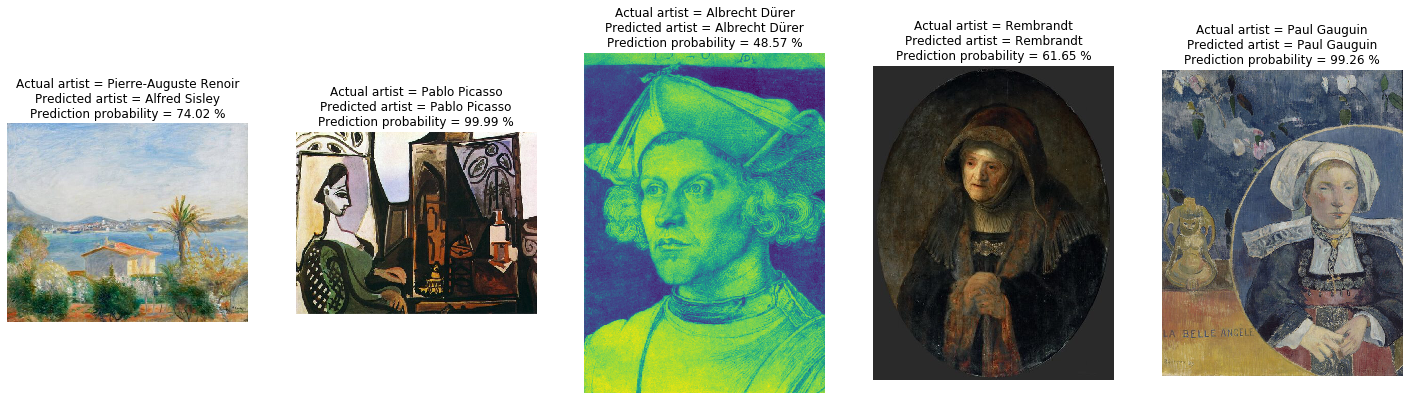

In [6]:
n = 5
fig, axes = plt.subplots(1, n, figsize=(25,10))
images_dir = '../data_images/resized/resized_train_test'
data_artists = pd.read_csv('../data/processed/data_artists.csv')
artists_dirs = os.listdir(images_dir)
artists_top_name = data_artists['name'].str.replace(' ', '_').values


for i in range(n):
    random_artist = random.choice(artists_top_name)
    random_image = random.choice(os.listdir(os.path.join(images_dir, random_artist)))
    random_image_file = os.path.join(images_dir, random_artist, random_image)

 # Original image
    test_image = image.load_img(random_image_file, target_size=(train_input_shape[0:2]))

# Predict artist
    test_image = image.img_to_array(test_image)
    test_image /= 255.
    test_image = np.expand_dims(test_image, axis=0)

    prediction = model.predict(test_image)
    prediction_probability = np.amax(prediction)
    prediction_idx = np.argmax(prediction)

    labels = train_generator.class_indices
    labels = dict((v,k) for k,v in labels.items())

#print("Actual artist =", random_artist.replace('_', ' '))
#print("Predicted artist =", labels[prediction_idx].replace('_', ' '))
#print("Prediction probability =", prediction_probability*100, "%")

    title = "Actual artist = {}\nPredicted artist = {}\nPrediction probability = {:.2f} %".format(random_artist.replace('_', ' '), labels[prediction_idx].replace('_', ' '),prediction_probability*100)

# Print image
    axes[i].imshow(plt.imread(random_image_file))
    axes[i].set_title(title)
    axes[i].axis('off')

plt.show()

In [7]:
# Predict from web - this is an image of Titian.
# Replace 'url' with any image of one of the 11 artists above and run this cell.
url = 'https://www.gpsmycity.com/img/gd/2081.jpg'

import imageio
import cv2

ModuleNotFoundError: No module named 'imageio'

In [ ]:
web_image = imageio.imread(url)
web_image = cv2.resize(web_image, dsize=train_input_shape[0:2], )
web_image = image.img_to_array(web_image)
web_image /= 255.
web_image = np.expand_dims(web_image, axis=0)


prediction = model.predict(web_image)
prediction_probability = np.amax(prediction)
prediction_idx = np.argmax(prediction)

In [ ]:
print("Predicted artist =", labels[prediction_idx].replace('_', ' '))
print("Prediction probability =", prediction_probability*100, "%")

plt.imshow(imageio.imread(url))
plt.axis('off')
plt.show()